# 1. Importaciones

In [78]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga de datos

In [72]:
data = [
    {"Nombre": "Fran Martínez", "Usuario": "@LaLigaenDirecto", "Tweet": "#DATO Faltan 96 horas para #ElGranDerbi. El @SevillaFC únicamente ha perdido 1 de los últimos 13 derbis ante el @RealBetis (2-1 en 2022). ⚽🔥", "Target": "Negativo"},
    {"Nombre": "Carlos Gómez", "Usuario": "@DeportesHoy", "Tweet": "Hoy es un día genial para empezar a trabajar en mis nuevos proyectos. ¡A por todas! 💪😃 #Motivación", "Target": "Positivo"},
    {"Nombre": "Lucía Pérez", "Usuario": "@LuciaPZ11", "Tweet": "A veces la vida te pone pruebas muy duras. Pero hay que seguir adelante. 😞💔 #Resiliencia", "Target": "Negativo"},
    {"Nombre": "José Rodríguez", "Usuario": "@JoseR_esp", "Tweet": "Estoy aprendiendo a tocar guitarra y me está costando mucho. ¿Alguien tiene algún consejo? 🎸😩 #Frustración", "Target": "Negativo"},
    {"Nombre": "Marta López", "Usuario": "@MartaLopz", "Tweet": "El sol brilla hoy y me siento llena de energía para afrontar el día. ☀️😄 #ActitudPositiva", "Target": "Positivo"},
    {"Nombre": "Pepe Sánchez", "Usuario": "@PepeSanchez10", "Tweet": "El tráfico está horrible hoy. ¿Por qué siempre hay atascos cuando más los necesitas? 🚗🚦😡 #Frustración", "Target": "Negativo"},
    {"Nombre": "Ana Belén", "Usuario": "@AnaBelenPerez", "Tweet": "Acabo de recibir noticias maravillosas, ¡me han ofrecido un nuevo trabajo! 🎉🤩 #Éxito", "Target": "Positivo"},
    {"Nombre": "David Morales", "Usuario": "@DavidMorales23", "Tweet": "Hoy tuve que cancelar todos mis planes debido a una reunión urgente. 😔📅 #MalDía", "Target": "Negativo"},
    {"Nombre": "Laura Castillo", "Usuario": "@LauraCastillo92", "Tweet": "Me siento tan afortunada por tener una familia que siempre me apoya. ❤️😊 #Gratitud", "Target": "Positivo"},
    {"Nombre": "Diego Ruiz", "Usuario": "@DiegoRuiz_10", "Tweet": "Estoy tan cansado de luchar por lo mismo una y otra vez. A veces todo parece en vano. 😞💭 #Desesperación", "Target": "Negativo"},
    {"Nombre": "Alba Martínez", "Usuario": "@AlbaMartinez99", "Tweet": "Las vacaciones están cerca, ya estoy planeando el próximo viaje a #Suiza. 🏔️✈️ #TravelGoals", "Target": "Positivo"},
    {"Nombre": "Pablo Sánchez", "Usuario": "@PabloSanchez21", "Tweet": "Finalmente conseguí terminar mi proyecto después de días de trabajo duro. ¡Qué satisfacción! 😃✅", "Target": "Positivo"},
    {"Nombre": "Verónica García", "Usuario": "@VeronicaG89", "Tweet": "Me siento tan frustrada por la cantidad de problemas técnicos que he tenido esta semana. 🖥️😤 #Problemas", "Target": "Negativo"},
    {"Nombre": "Raúl Herrera", "Usuario": "@RaulH_87", "Tweet": "Lo mejor de esta semana ha sido ver el amanecer en la playa. 🌅😊 #Paz", "Target": "Positivo"},
    {"Nombre": "Claudia Díaz", "Usuario": "@ClaudiaD_12", "Tweet": "Parece que hoy todo va mal. ¿Por qué no puedo hacer que las cosas salgan bien? 😭💢 #Frustración", "Target": "Negativo"},
    {"Nombre": "Fernando López", "Usuario": "@FerLopz22", "Tweet": "#Tecnología Hoy estoy probando la nueva actualización de #Windows11, ¿qué os parece? 💻🤔", "Target": "Positivo"},
    {"Nombre": "Inés Rodríguez", "Usuario": "@InesR_23", "Tweet": "El libro que estoy leyendo es tan interesante, no puedo dejar de leerlo. 📖😍 #Lectura", "Target": "Positivo"},
    {"Nombre": "Javier Martín", "Usuario": "@JaviMartn34", "Tweet": "La semana pasada recibí una mala noticia que me ha dejado bastante desconcertado. 😢📉 #Desilusión", "Target": "Negativo"},
    {"Nombre": "Elena García", "Usuario": "@ElenaGarcia_11", "Tweet": "¡Qué gran partido del @SevillaFC hoy! El ambiente en el estadio era increíble. ⚽🔥 #ElGranDerbi", "Target": "Positivo"}
]

df_tweets = pd.DataFrame(data)

df_tweets.head()

,Nombre,Usuario,Tweet,Target
0,Fran Martínez,@LaLigaenDirecto,#DATO Faltan 96 horas para #ElGranDerbi. El @S...,Negativo
1,Carlos Gómez,@DeportesHoy,Hoy es un día genial para empezar a trabajar e...,Positivo
2,Lucía Pérez,@LuciaPZ11,A veces la vida te pone pruebas muy duras. Per...,Negativo
3,José Rodríguez,@JoseR_esp,Estoy aprendiendo a tocar guitarra y me está c...,Negativo
4,Marta López,@MartaLopz,El sol brilla hoy y me siento llena de energía...,Positivo


# 3 Limpieza de datos

In [73]:
# Preprocesamiento: eliminar menciones y hashtags
def limpiar_texto(texto):
    texto = re.sub(r'@\w+', '', texto)  # Eliminar menciones
    texto = re.sub(r'#\w+', '', texto)  # Eliminar hashtags
    return texto.strip()

df_tweets["Contenido"] = df_tweets["Tweet"].astype(str).apply(limpiar_texto)

In [74]:
print(df_tweets['Tweet'])

0     #DATO Faltan 96 horas para #ElGranDerbi. El @S...
1     Hoy es un día genial para empezar a trabajar e...
2     A veces la vida te pone pruebas muy duras. Per...
3     Estoy aprendiendo a tocar guitarra y me está c...
4     El sol brilla hoy y me siento llena de energía...
5     El tráfico está horrible hoy. ¿Por qué siempre...
6     Acabo de recibir noticias maravillosas, ¡me ha...
7     Hoy tuve que cancelar todos mis planes debido ...
8     Me siento tan afortunada por tener una familia...
9     Estoy tan cansado de luchar por lo mismo una y...
10    Las vacaciones están cerca, ya estoy planeando...
11    Finalmente conseguí terminar mi proyecto despu...
12    Me siento tan frustrada por la cantidad de pro...
13    Lo mejor de esta semana ha sido ver el amanece...
14    Parece que hoy todo va mal. ¿Por qué no puedo ...
15    #Tecnología Hoy estoy probando la nueva actual...
16    El libro que estoy leyendo es tan interesante,...
17    La semana pasada recibí una mala noticia q

# 4. Separación de los conjuntos de datos

In [75]:
# Convertir etiquetas a numéricas
df_tweets["Target"] = df_tweets["Target"].map({"Negativo": 0, "Positivo": 1})

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_tweets["Tweet"], df_tweets["Target"], test_size=0.3, random_state=42)

# 5. Entrenamiento del modelo

In [76]:
# Crear modelo de Naive Bayes con TF-IDF
modelo = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Entrenar modelo
modelo.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

# 6. Evaluación

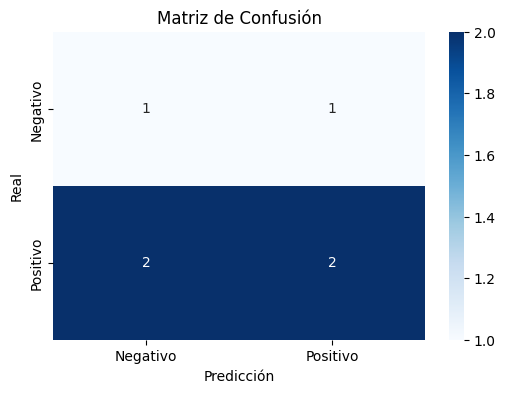

Precisión
0.5
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [79]:
# Evaluación
y_pred = modelo.predict(X_test)

precision = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Precisión
print("Precisión")
print(precision)

# Reporte
print(reporte)